In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
df = pd.read_csv('placement.csv')

In [41]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

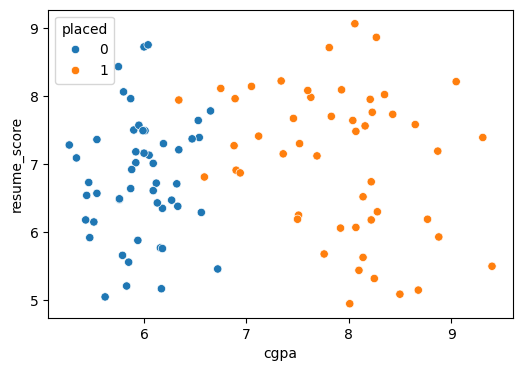

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'cgpa',y = 'resume_score',hue = 'placed',data = df)

In [43]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [44]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(x,y)

Perceptron()

In [45]:
p.coef_

array([[ 40.26, -36.  ]])

In [46]:
p.intercept_

array([-25.])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


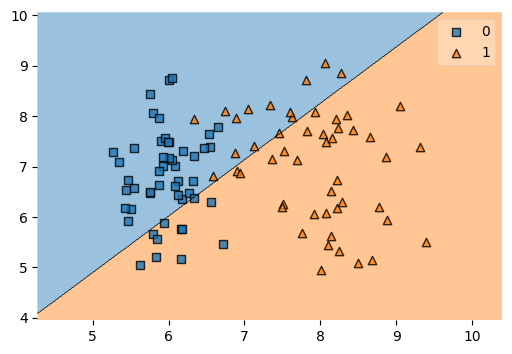

In [47]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(6,4))
plot_decision_regions(x.values,y.values,clf = p,legend=True)
plt.show()

In [48]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1,hypercube=False,class_sep=10)

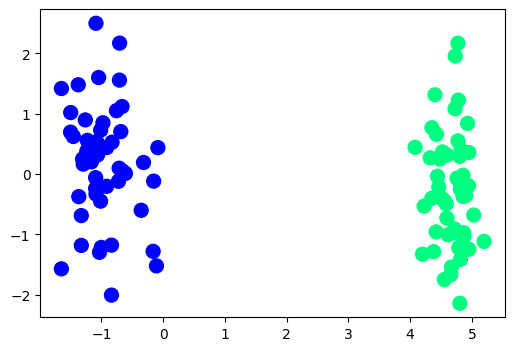

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [50]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(100):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]


In [51]:
def step(z):
  return 1 if z>0 else 0

In [52]:
intercept_,coef_ = perceptron(X,y)

In [53]:
print(coef_)
print(intercept_)

[1.51122209 0.30535629]
0.10000000000000014


In [54]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [55]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

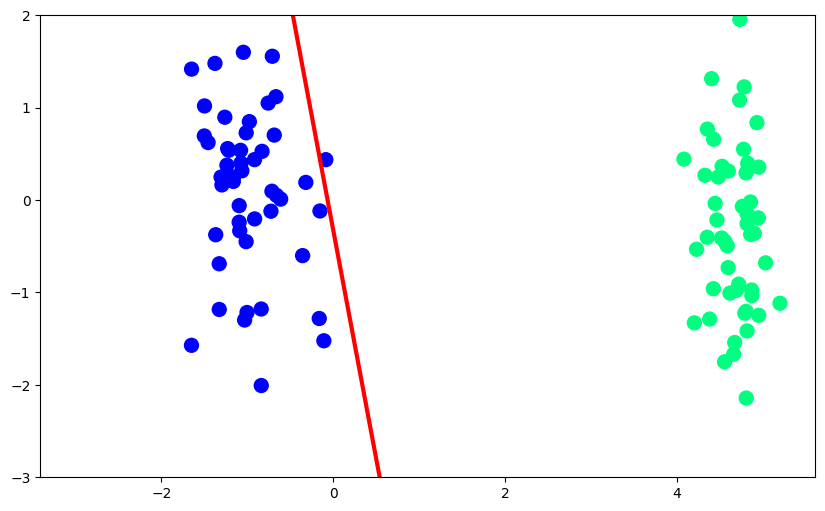

In [56]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)